# Estadistica Aplicada

Sesion 15, 25 de septiembre

Ricardo de Jesús Cervantes García 1958971

GPO 41

In [3]:
## 1-Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Librerias especializadas
from statsmodels.tsa.seasonal import seasonal_decompose
## tamaño graficas (largo,alto)
plt.rcParams['figure.figsize']=(10,6)

In [7]:
## Datos
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month', parse_dates=True)
pasajeros

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
pasajeros = pasajeros.rename(columns={'Thousands of Passengers': 'miles de pasajeros'})

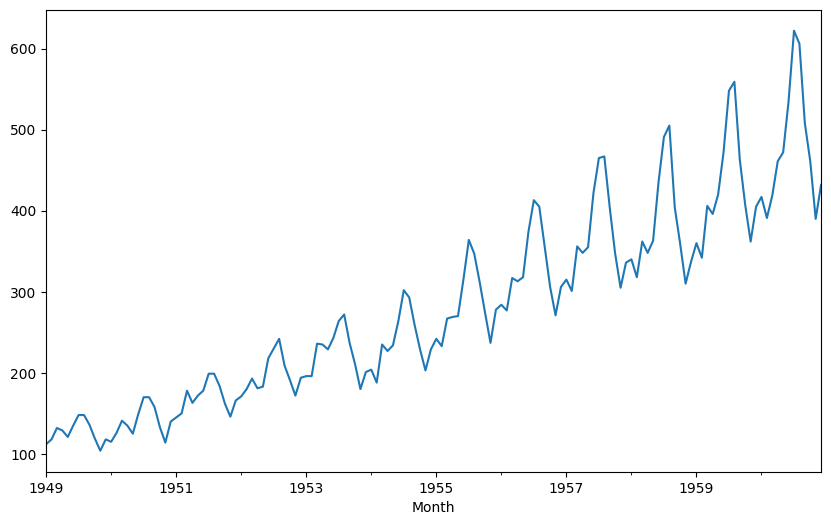

In [9]:
pasajeros['miles de pasajeros'].plot();

Esta serie tiene tendencia creciente y un marcado componente estacional.

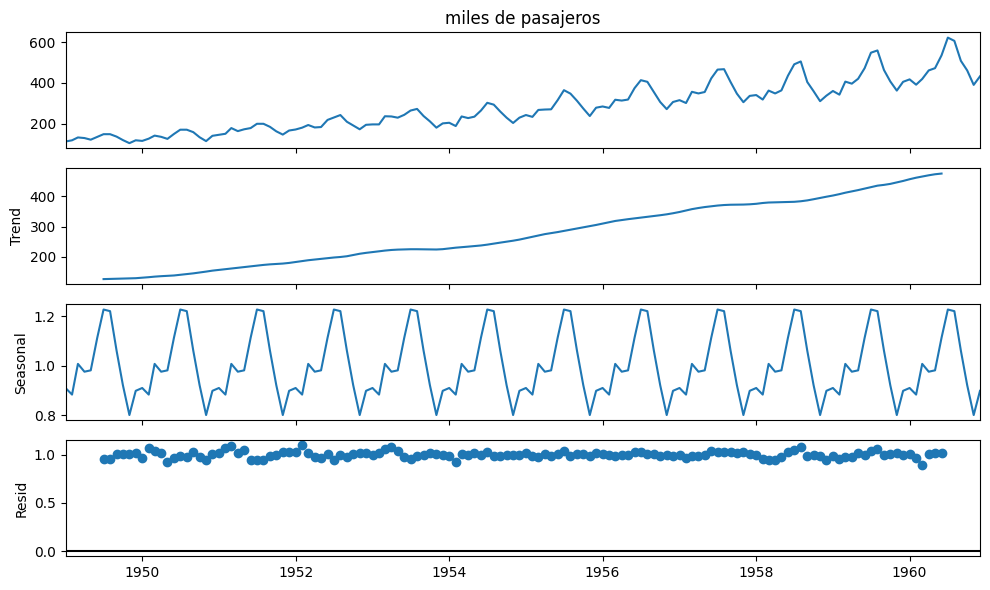

In [10]:
## Vamos a descomponer la serie en 3 elementos 
## 1 tendencia ciclo
## 2 estacional
## 3 irregular
ets1 = seasonal_decompose(pasajeros['miles de pasajeros'], model='mult')
ets1.plot();

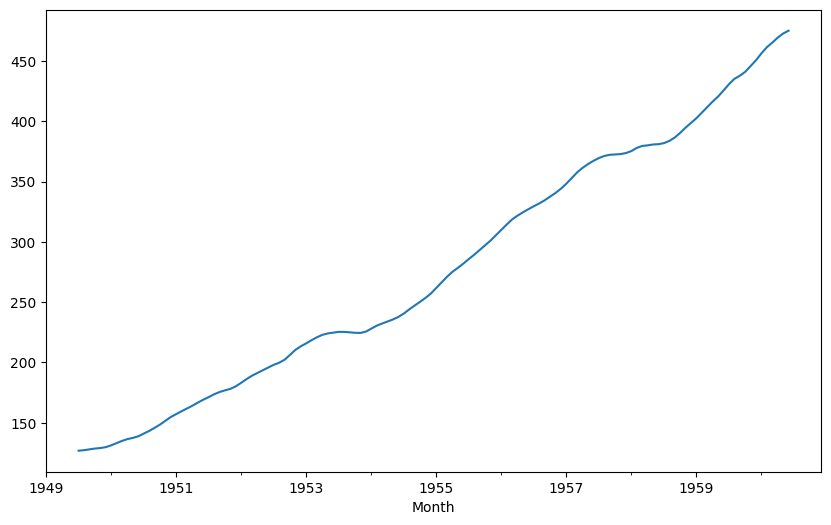

In [11]:
## tendencia-ciclo
ets1.trend.head()
## Graficar tendencia-ciclo
ets1.trend.plot();

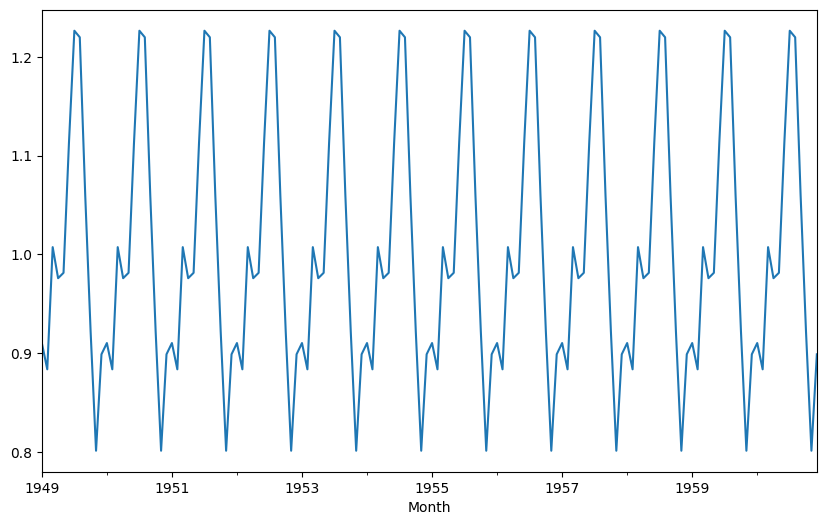

In [12]:
## componente estacional
ets1.seasonal.head(12)
## Graficar componente estacional
ets1.seasonal.plot();

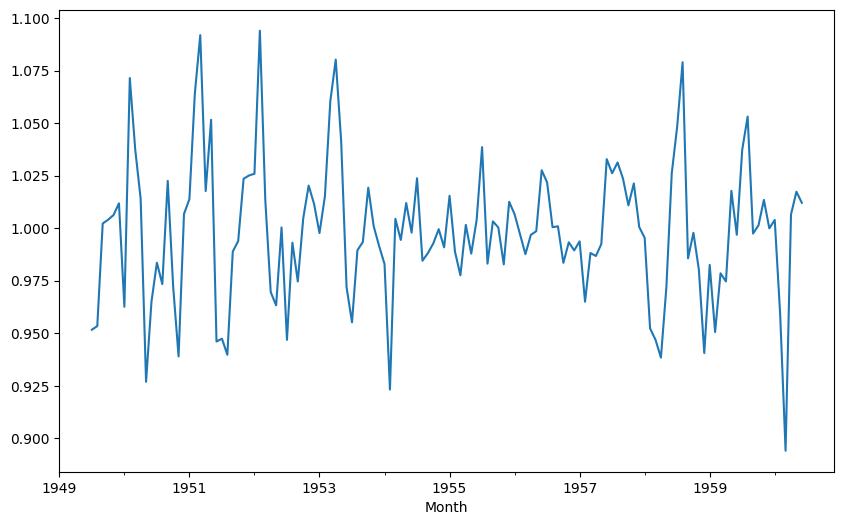

In [13]:
## componente irregular
ets1.resid.head()
## Graficar componente irregular
ets1.resid.plot();

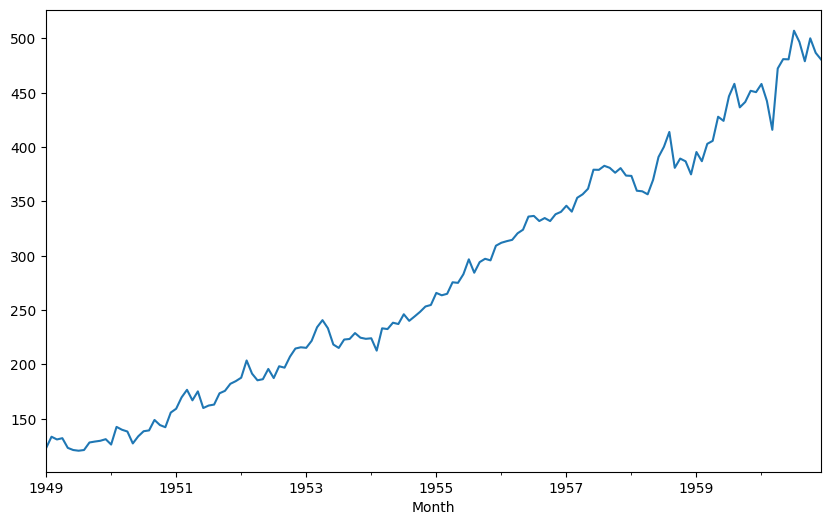

In [14]:
## desestacionalizar 
pasajeros['desestacionalizada'] = pasajeros['miles de pasajeros']/ets1.seasonal
pasajeros['desestacionalizada'].plot();

In [36]:
pasajeros.to_excel('pasajeros.xlsx')

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf

In [6]:
walmex=yf.download('WALMEX.MX', start='2016-01-01',end='2021-12-31',progress=False)

In [15]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,42.959999,43.299999,42.299999,42.840000,35.479027,6483179
2016-01-05,42.849998,43.900002,42.540001,42.660000,35.329952,8115974
2016-01-06,42.650002,43.020000,42.070000,42.380001,35.098072,12511056
2016-01-07,41.320000,42.240002,39.259998,39.990002,33.118732,18124494
2016-01-08,40.990002,41.490002,40.700001,41.029999,33.980026,15949791


In [16]:
walmex=walmex['Adj Close']

In [18]:
walmex.to_excel('walmex.xlsx')